### Attach Image to Dataframe 

In [ ]:
import PIL
import io
import cv2
import requests 
import shutil
import pandas as pd
from glob import glob
from IPython.core.display import display,HTML

In [ ]:
import pandas as pd
import numpy as np;np.random.seed(1)
import matplotlib.pyplot as plt
import matplotlib.colors
from io import BytesIO
import base64

### Save HTML Dataframe from Image URL

In [57]:
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

In [59]:
df = pd.DataFrame([['A231', 'Book', 5, 3, 150], 
                   ['M441', 'Magic Staff', 10, 7, 200]],
                   columns = ['Code', 'Name', 'Price', 'Net', 'Sales'])

# your images
images1 = ['https://vignette.wikia.nocookie.net/2007scape/images/7/7a/Mage%27s_book_detail.png/revision/latest?cb=20180310083825',
          'https://i.pinimg.com/originals/d9/5c/9b/d95c9ba809aa9dd4cb519a225af40f2b.png'] 


images2 = ['https://static3.srcdn.com/wordpress/wp-content/uploads/2020/07/Quidditch.jpg?q=50&fit=crop&w=960&h=500&dpr=1.5',
           'https://specials-images.forbesimg.com/imageserve/5e160edc9318b800069388e8/960x0.jpg?fit=scale']

df['imageUrls'] = images1
df['otherImageUrls'] = images2          

pd.set_option('display.max_colwidth', None)

image_cols = ['imageUrls', 'otherImageUrls']  

format_dict = {}
for image_col in image_cols:
    format_dict[image_col] = path_to_image_html

display(HTML(df.to_html(escape=False, formatters=format_dict)))

,Code,Name,Price,Net,Sales,imageUrls,otherImageUrls
0,A231,Book,5,3,150,,
1,M441,Magic Staff,10,7,200,,


In [ ]:
df.to_html('test_html.html', escape=False, formatters=format_dict)

### Save HTML Dataframe from Image File

In [65]:
def save_image_from_url(images_url_list):  
    col_index_list = []
    img_path_list = []
    img_path_list1 = []
    img_path_list2 = []

    for row_index, images_url in enumerate(images_url_list):
        for col_index, url in enumerate(images_url):
            col_index_list.append(col_index)
            res = requests.get(url, stream = True)
            file_name = "image_row" + str(row_index) + "_col" + str(col_index) + ".png"
            if res.status_code == 200:
                with open(file_name,'wb') as f:
                    shutil.copyfileobj(res.raw, f)

                if col_index == 0:
                    img_path_list1.append(file_name) 

                if col_index == 1:
                    img_path_list2.append(file_name) 

    img_path_list = [img_path_list1, img_path_list2]
    return img_path_list

In [76]:
def path_to_image_html(path):  
    figfile = BytesIO()         
    img = PIL.Image.open(path).convert('RGB')
    img.save(figfile, format='png', quality=100) 
    figfile.seek(0) 
    figdata_png = base64.b64encode(figfile.getvalue()).decode()
    imgstr = '<img src="data:image/png;base64,{}" />'.format(figdata_png)  
    return imgstr

,Code,Name,Price,Net,Sales,imageUrls,otherImageUrls
0,A231,Book,5,3,150,,
1,M441,Magic Staff,10,7,200,,

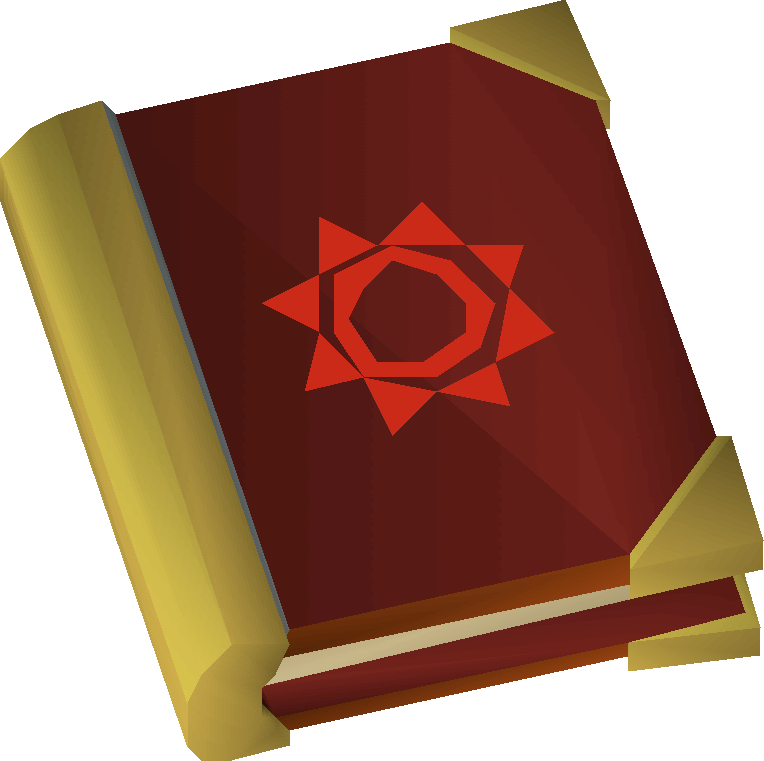
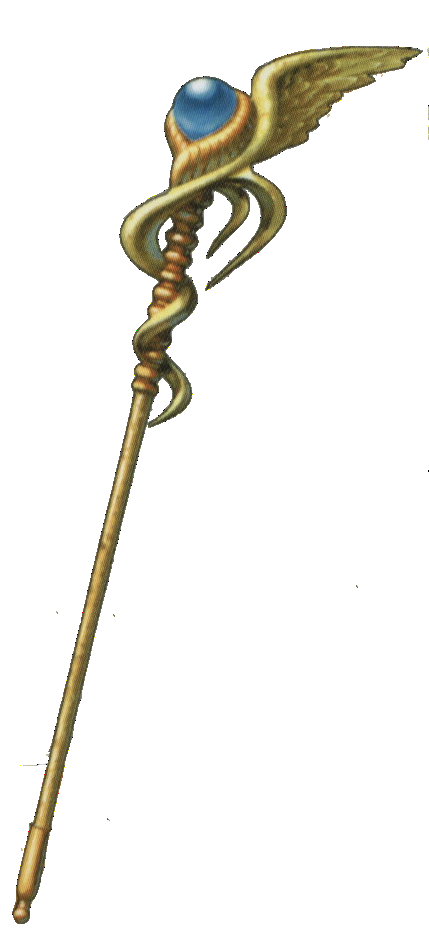
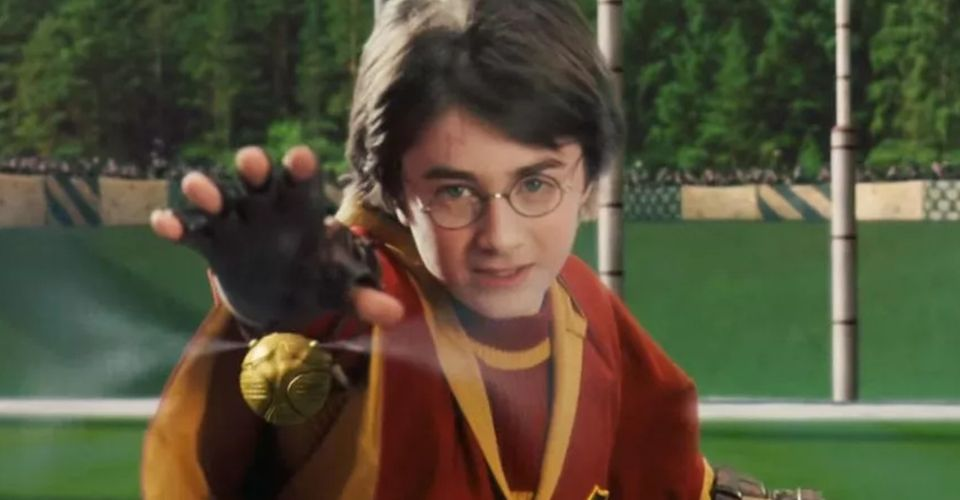
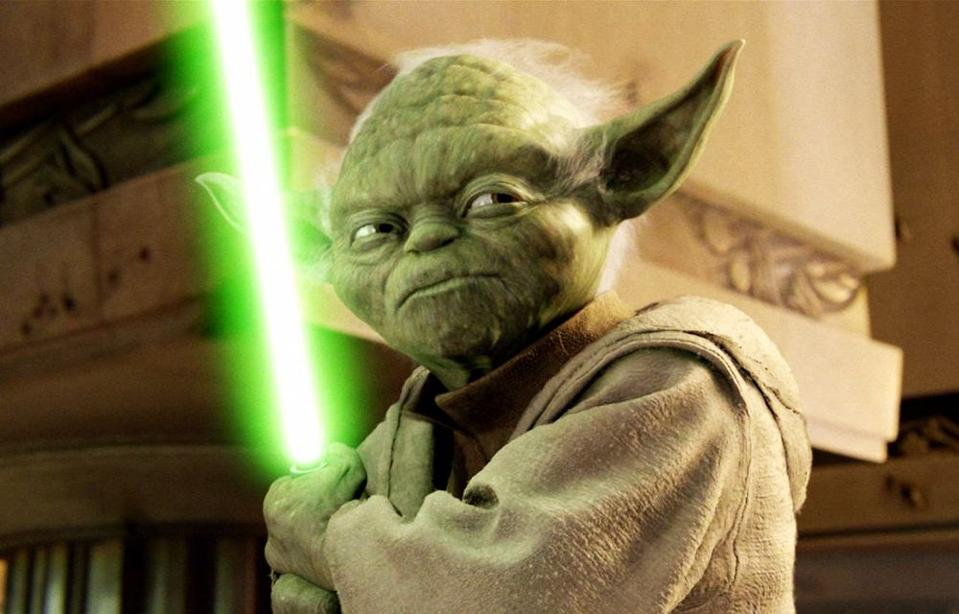

In [77]:
df = pd.DataFrame([['A231', 'Book', 5, 3, 150, "", ""], 
                   ['M441', 'Magic Staff', 10, 7, 200, "", ""]],
                   columns = ['Code', 'Name', 'Price', 'Net', 'Sales', 'imageUrls', 'otherImageUrls'])

images_url_1 = ['https://vignette.wikia.nocookie.net/2007scape/images/7/7a/Mage%27s_book_detail.png/revision/latest?cb=20180310083825',
          'https://i.pinimg.com/originals/d9/5c/9b/d95c9ba809aa9dd4cb519a225af40f2b.png'] 


images_url_2 = ['https://static3.srcdn.com/wordpress/wp-content/uploads/2020/07/Quidditch.jpg?q=50&fit=crop&w=960&h=500&dpr=1.5',
           'https://specials-images.forbesimg.com/imageserve/5e160edc9318b800069388e8/960x0.jpg?fit=scale']

images_url_list = [images_url_1, images_url_2]


img_path_list = save_image_from_url(images_url_list)

image_cols = ['imageUrls', 'otherImageUrls']

df['imageUrls'] = img_path_list[0]
df['otherImageUrls'] = img_path_list[1]         

format_dict = {}
for image_col in image_cols:
    format_dict[image_col] = path_to_image_html

pd.set_option('display.max_colwidth', 1)
HTML(df.to_html(escape=False, formatters=format_dict))

In [68]:
df.to_html('test_html.html', escape=False, formatters=format_dict)

### Save HTML Dataframe from Matplotlib Image File

,info,status
0,5,
1,8,
2,9,
3,5,
4,0,
5,0,
6,1,
7,7,
8,6,
9,9,

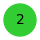
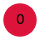
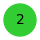
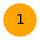
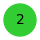
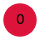
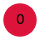
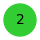
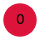
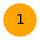

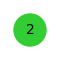

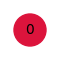

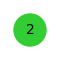

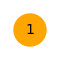

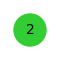

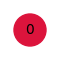

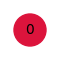

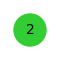

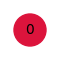

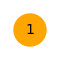

In [37]:
import pandas as pd
import numpy as np;np.random.seed(1)
import matplotlib.pyplot as plt
import matplotlib.colors
from io import BytesIO
import base64

df = pd.DataFrame({"info" : np.random.randint(0,10,10), 
                   "status" : np.random.randint(0,3,10)})

cmap = matplotlib.colors.ListedColormap(["crimson","orange","limegreen"])

def createFigure(i):
    fig, ax = plt.subplots(figsize=(.4,.4))
    fig.subplots_adjust(0,0,1,1)
    ax.axis("off")
    ax.axis([0,1,0,1])
    c = plt.Circle((.5,.5), .4, color=cmap(i))
    ax.add_patch(c)
    ax.text(.5,.5, str(i), ha="center", va="center")
    return fig

def fig2inlinehtml(fig,i):
    figfile = BytesIO()
    fig.savefig(figfile, format='png')
    figfile.seek(0) 
    # for python 2.7:
    #figdata_png = base64.b64encode(figfile.getvalue())
    # for python 3.x:
    figdata_png = base64.b64encode(figfile.getvalue()).decode()
    imgstr = '<img src="data:image/png;base64,{}" />'.format(figdata_png)
    return imgstr

def mapping(i):
    fig = createFigure(i)
    return fig2inlinehtml(fig,i)

pd.set_option('display.max_colwidth', 1)
HTML(df.to_html(escape=False, formatters=dict(status=mapping)))

In [ ]:
df.to_html('test_html.html', escape=False, formatters=format_dict)

### Reference

ScrapingBee
<br>[How To Download An Image With Python?](https://www.scrapingbee.com/blog/download-image-python/)

<br>Stackoverflow
<br>[Adding image to pandas DataFrame](https://stackoverflow.com/questions/53468558/adding-image-to-pandas-dataframe)
<br>[Insert matplotlib images into a pandas dataframe](https://stackoverflow.com/questions/47038538/insert-matplotlib-images-into-a-pandas-dataframe)